# data cleaning
We know that Pandas will recognize “NA” as a missing value, but what about the others? 
If there’s multiple users manually entering data, then this is a common problem. 
Maybe i like to use “n/a” but you like to use “unkown”.
We will also drop columns that are not used like, US DVD Sales, MPAA Rating etc.
We will then turn the "Worldwide Gross" column into a numeric type so pandas can make a histogram out of it.

In [1]:
import matplotlib.pyplot as plt
import numpy.ma as ma
import pandas as pd
import numpy as np
import math 
from scipy import stats
%matplotlib inline


missing_values = ["n/a", "na", "--","unknown","Unknown","0"]

movie_data = pd.read_csv("movies.csv",na_values = missing_values)

to_drop =['US DVD Sales',
         'MPAA Rating',
         'Running Time (min)',
         'Distributor',
         'Source',
         'Creative Type',
         'Release Date']

new_names =  {'Worldwide Gross': 'w_gross',
             'Production Budget':'p_budget',
             'Major Genre': 'm_genre',
             'IMDB Votes':'imdb_votes',
             'IMDB Rating':'imdb_rating',
             'Rotten Tomatoes Rating': 'tomatoes',
             'US Gross': 'us_gross'}


#drop unnecessary columns
movie_data.drop(to_drop, inplace=True, axis=1)

#remove all NaN rows and re-index the dataframe
#this is done specifically for computing the p-value through the stats.pearsonr method
#that does not support NaNs and infinities.

movie_data = movie_data.dropna()
movie_data = movie_data.reset_index(drop=True)


#rename columns, some commands cant handle variables with spaces
movie_data.rename(columns=new_names, inplace=True)

#transform strings to numeric
movie_data["w_gross"] = pd.to_numeric(movie_data["w_gross"])


# plotting the histograms
with the first graphs we can see that there is a clear corellation between the Worldwide Gross and the number of IMDB Votes as they clearly follow a geometric distribution.

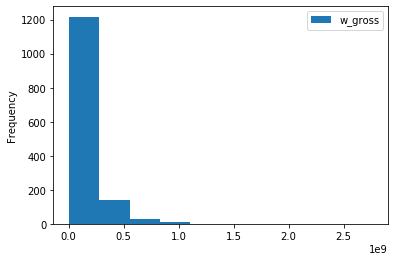

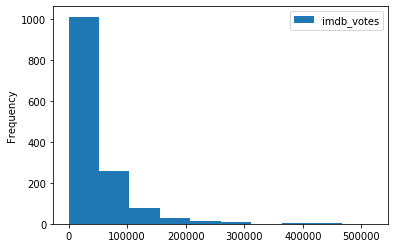

In [2]:
movie_data.plot.hist(y='w_gross') 
movie_data.plot.hist(y='imdb_votes')


The "Rotten tomatoes rating" somehow resembles a uniform distribution with a peak and at the value 90 and a bottom at value 10. The 

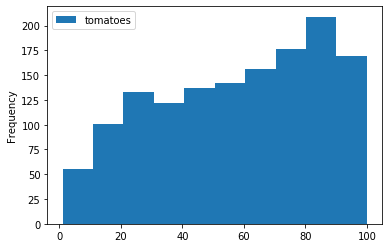

In [3]:
movie_data.plot.hist(y='tomatoes')

The "IMDB rating" follows a left-skewed distribution. The mean is to the left of the peak. This is the main definition behind “skewness”, which is technically a measure of the distribution of values around the mean.

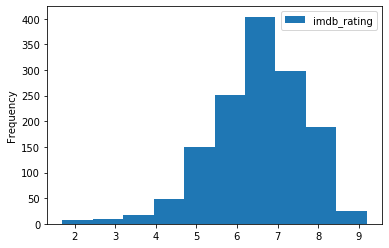

In [4]:
movie_data.plot.hist(y='imdb_rating')


# counting the number of movies for every major genre
Its clear that the most popular genres are drama and comedy.


Drama                  392
Comedy                 310
Action                 230
Adventure              134
Thriller/Suspense      127
Horror                  71
Romantic Comedy         68
Musical                 21
Western                 20
Black Comedy            19
Documentary              7
Concert/Performance      1
Name: m_genre, dtype: int64


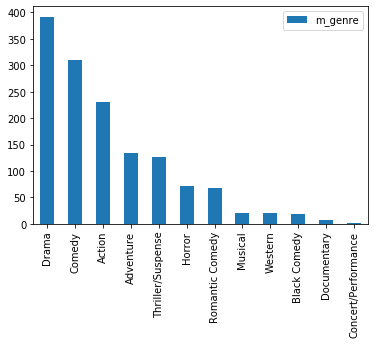

In [5]:
# Count unique values in column 'm_genre' of the dataframe
genres_count_values = movie_data['m_genre'].value_counts()

# Value table
print(genres_count_values)

# Make a pandas dataframe out of the pandas series
genres_count_dataframe = pd.DataFrame(genres_count_values)

# Plot the graph
genres_count_dataframe.plot.bar()


# log-log plot

We will define some bins with exponential increasing size. We will use the numpy.logspace that returns an evenly space logarithmic sequence of numbers. Using the base=N keyword argument we can set the base of the exponent. For example if we get the imdb_votes column the minimum is 18 and the maximum is 519541. If we want to bin the entire set with an exponential growth of numbers from the minimum to the maximum value with a base of 10 we have 51 bins. That's not readable.

minimum value of the imdb_votes:33.0
maximum value of the imdb_votes:519541.0
Exponential increasing bins to include the data range: [33, 40, 48, 59, 72, 88, 107, 131, 159, 194, 237, 288, 351, 428, 522, 635, 774, 943, 1148, 1399, 1704, 2076, 2528, 3080, 3751, 4569, 5566, 6779, 8257, 10058, 12250, 14921, 18175, 22137, 26964, 32843, 40003, 48725, 59348, 72288, 88048, 107245, 130627, 159106, 193795, 236047, 287510, 350194, 426544, 519540]


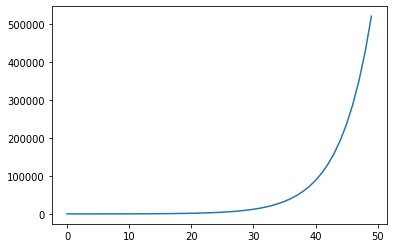

Mean values: [36, 44, 53, 65, 80, 97, 119, 145, 176, 215, 262, 319, 389, 475, 578, 704, 858, 1045, 1273, 1551, 1890, 2302, 2804, 3415, 4160, 5067, 6172, 7518, 9157, 11154, 13585, 16548, 20156, 24550, 29903, 36423, 44364, 54036, 65818, 80168, 97646, 118936, 144866, 176450, 214921, 261778, 318852, 388369, 473042]


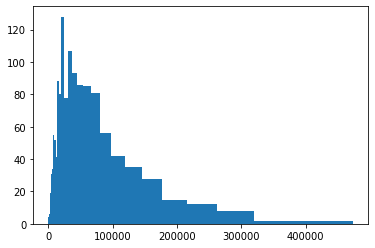

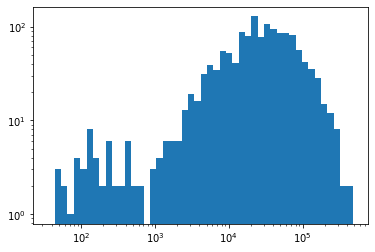

In [6]:
min_value_imdb_votes = movie_data['imdb_votes'].min()
max_value_imdb_votes = movie_data['imdb_votes'].max()

print('minimum value of the imdb_votes:'+str(min_value_imdb_votes))
print('maximum value of the imdb_votes:'+str(max_value_imdb_votes))

#generate sequence of exponentially increasing numbers

end_value = np.log(max_value_imdb_votes)/np.log(min_value_imdb_votes)

exponential_bins = np.logspace(1,end_value,base=min_value_imdb_votes).astype(int)
exponential_bins = list(exponential_bins)

print('Exponential increasing bins to include the data range:',exponential_bins)
plt.plot(exponential_bins)
plt.show()

#empty list to hold the mean values
mean_values = []

#length of the list that holds the bin ranges
bin_ranges_list_length = len(exponential_bins)

#find the mean values of the bins
for i,obj in enumerate(exponential_bins):
    if i < (bin_ranges_list_length - 1):
    
        current = exponential_bins[i]
        next_ = exponential_bins[i + 1]
        
        mean_value_of_the_bin = ((current+next_)/2)
        mean_values.append(int(mean_value_of_the_bin))

        
exponential_bins = list(exponential_bins)
mean_values = list(mean_values)

print('Mean values:',mean_values)


#mean values as input for bucket limits
plt.hist(movie_data['imdb_votes'], bins=mean_values)
plt.show()
#in a log-log scale
plt.hist(movie_data['imdb_votes'], bins=mean_values)
plt.yscale('log')
plt.xscale('log')
plt.show()

## doing the same for the w_gross column

minimum value of the w_gross:20987.0
maximum value of the w_gross:2767891499.0
Exponential increasing bins to include the data range: [20987, 26695, 33957, 43194, 54944, 69890, 88902, 113085, 143847, 182976, 232749, 296062, 376596, 479038, 609346, 775100, 985943, 1254139, 1595290, 2029240, 2581234, 3283380, 4176524, 5312622, 6757760, 8596004, 10934287, 13908629, 17692051, 22504638, 28626344, 36413275, 46318404, 58917925, 74944764, 95331219, 121263192, 154249174, 196207995, 249580443, 317471250, 403829697, 513679346, 653410269, 831150760, 1057240174, 1344830372, 1710650780, 2175981560, 2767891498]


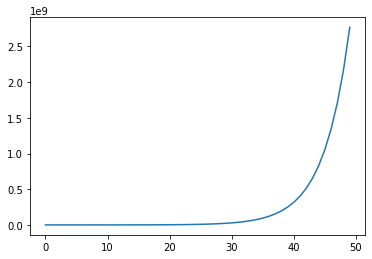

Mean values: [23841, 30326, 38575, 49069, 62417, 79396, 100993, 128466, 163411, 207862, 264405, 336329, 427817, 544192, 692223, 880521, 1120041, 1424714, 1812265, 2305237, 2932307, 3729952, 4744573, 6035191, 7676882, 9765145, 12421458, 15800340, 20098344, 25565491, 32519809, 41365839, 52618164, 66931344, 85137991, 108297205, 137756183, 175228584, 222894219, 283525846, 360650473, 458754521, 583544807, 742280514, 944195467, 1201035273, 1527740576, 1943316170, 2471936529]


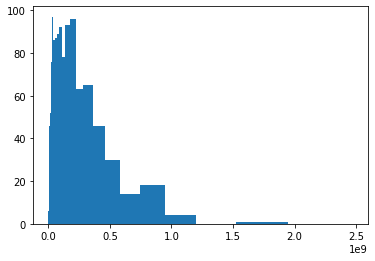

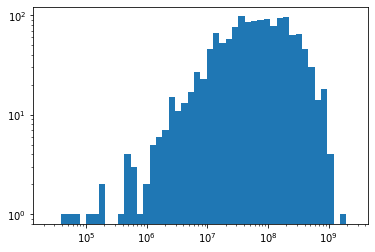

In [7]:
min_value_w_gross = movie_data['w_gross'].min()
max_value_w_gross = movie_data['w_gross'].max()

print('minimum value of the w_gross:'+str(min_value_w_gross))
print('maximum value of the w_gross:'+str(max_value_w_gross))

#generate sequence of exponentially increasing numbers

end_value = np.log(max_value_w_gross)/np.log(min_value_w_gross)

exponential_bins = np.logspace(1,end_value,base=min_value_w_gross).astype(int)
exponential_bins = list(exponential_bins)

print('Exponential increasing bins to include the data range:',exponential_bins)
plt.plot(exponential_bins)
plt.show()

#empty list to hold the mean values
mean_values = []

#length of the list that holds the bin ranges
bin_ranges_list_length = len(exponential_bins)

#find the mean values of the bins
for i,obj in enumerate(exponential_bins):
    if i < (bin_ranges_list_length - 1):
    
        current = exponential_bins[i]
        next_ = exponential_bins[i + 1]
        
        mean_value_of_the_bin = ((current+next_)/2)
        mean_values.append(int(mean_value_of_the_bin))

        
mean_values = list(mean_values)
print('Mean values:',mean_values)

#mean values as input for bucket limits
plt.hist(movie_data['w_gross'], bins=mean_values)
plt.show()
#in a log-log scale
plt.hist(movie_data['w_gross'], bins=mean_values)
plt.yscale('log')
plt.xscale('log')
plt.show()

# scatter plot of w_gross and imdb_votes

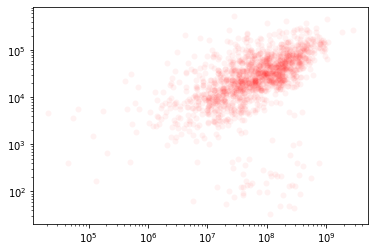

In [8]:
fig = plt.figure()
ax = plt.gca()
ax.plot(movie_data['w_gross'] ,movie_data['imdb_votes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax.set_yscale('log')
ax.set_xscale('log')

We can see that there is a direct corellation between those two columns.

# attributes correlation

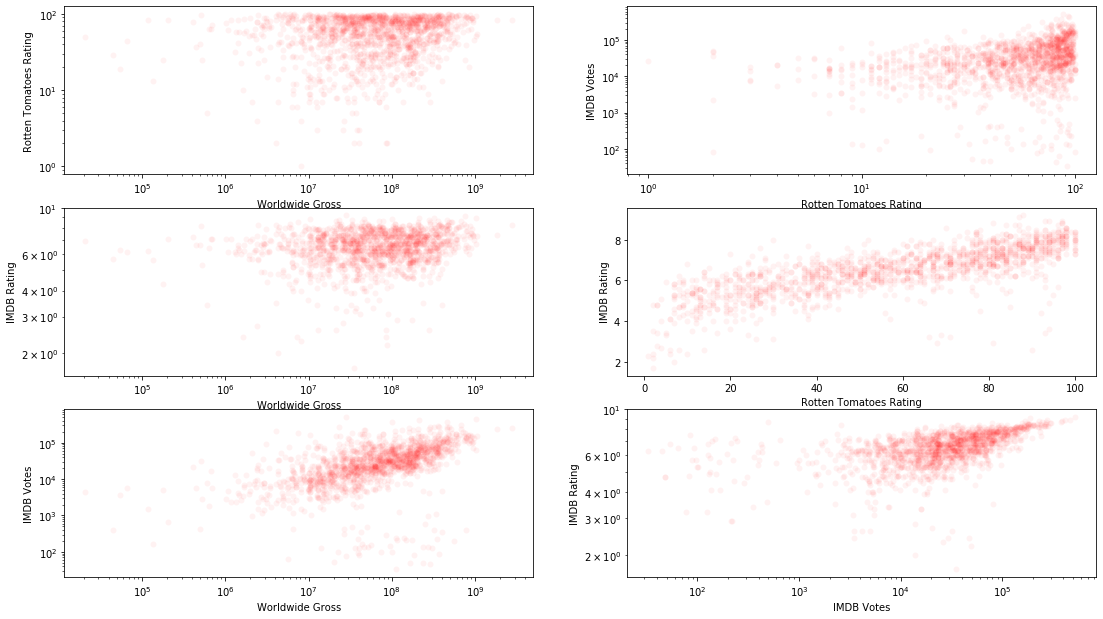

In [9]:
fig, ax = plt.subplots(3, 2)

#increase figure size
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax[0, 0].plot(movie_data['w_gross'] ,movie_data['tomatoes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[0, 0].set_xlabel('Worldwide Gross')
ax[0, 0].set_ylabel('Rotten Tomatoes Rating')
ax[0, 0].set_xscale('log')
ax[0, 0].set_yscale('log')

ax[1, 0].plot(movie_data['w_gross'] ,movie_data['imdb_rating'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[1, 0].set_xlabel('Worldwide Gross')
ax[1, 0].set_ylabel('IMDB Rating')
ax[1, 0].set_xscale('log')
ax[1, 0].set_yscale('log')

ax[2, 0].plot(movie_data['w_gross'] ,movie_data['imdb_votes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[2, 0].set_xlabel('Worldwide Gross')
ax[2, 0].set_ylabel('IMDB Votes')
ax[2, 0].set_xscale('log')
ax[2, 0].set_yscale('log')

ax[0, 1].plot(movie_data['tomatoes'] ,movie_data['imdb_votes'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[0, 1].set_xlabel('Rotten Tomatoes Rating')
ax[0, 1].set_ylabel('IMDB Votes')
ax[0, 1].set_xscale('log')
ax[0, 1].set_yscale('log')

ax[1, 1].plot(movie_data['tomatoes'] ,movie_data['imdb_rating'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[1, 1].set_xlabel('Rotten Tomatoes Rating')
ax[1, 1].set_ylabel('IMDB Rating')
ax[0, 1].set_xscale('log')
ax[0, 1].set_yscale('log')

ax[2, 1].plot(movie_data['imdb_votes'] ,movie_data['imdb_rating'] ,'o', c='red', alpha=0.05, markeredgecolor='none')
ax[2, 1].set_xlabel('IMDB Votes')
ax[2, 1].set_ylabel('IMDB Rating')
ax[2, 1].set_xscale('log')
ax[2, 1].set_yscale('log')


plt.show()

## pearson corelation
for example w_gross with US Gross have a corellation of 0.939742

In [10]:
print(movie_data.corr(method='pearson'))

             us_gross   w_gross  p_budget  tomatoes  imdb_rating  imdb_votes
us_gross     1.000000  0.940209  0.590192  0.177061     0.203914    0.517073
w_gross      0.940209  1.000000  0.644717  0.154815     0.199960    0.516894
p_budget     0.590192  0.644717  1.000000 -0.134634    -0.018445    0.284638
tomatoes     0.177061  0.154815 -0.134634  1.000000     0.745973    0.356346
imdb_rating  0.203914  0.199960 -0.018445  0.745973     1.000000    0.545501
imdb_votes   0.517073  0.516894  0.284638  0.356346     0.545501    1.000000


## Spearman corelation

In [11]:
print(movie_data.corr(method='spearman'))

             us_gross   w_gross  p_budget  tomatoes  imdb_rating  imdb_votes
us_gross     1.000000  0.947757  0.525237  0.136987     0.154080    0.558657
w_gross      0.947757  1.000000  0.580321  0.115551     0.165083    0.608318
p_budget     0.525237  0.580321  1.000000 -0.262168    -0.135411    0.286228
tomatoes     0.136987  0.115551 -0.262168  1.000000     0.777658    0.351918
imdb_rating  0.154080  0.165083 -0.135411  0.777658     1.000000    0.589930
imdb_votes   0.558657  0.608318  0.286228  0.351918     0.589930    1.000000


In [12]:
numeric_columns = ['us_gross','w_gross','p_budget','tomatoes','imdb_rating','imdb_votes']
corr = []

p_values = pd.DataFrame()  # Matrix of p-values
for x in movie_data.columns:
    for y in movie_data.columns:
        #return pearson correlation coefficient and p-value for testing non-correlation
        if(x in numeric_columns and y in numeric_columns):
            corr = stats.pearsonr(movie_data[x], movie_data[y])
            p_values.loc[x,y] = corr[1]
print(p_values)

                  us_gross        w_gross       p_budget       tomatoes  \
us_gross      0.000000e+00   0.000000e+00  3.668774e-132   2.525761e-11   
w_gross       0.000000e+00   0.000000e+00  2.622893e-165   5.793008e-09   
p_budget     3.668774e-132  2.622893e-165   0.000000e+00   4.279225e-07   
tomatoes      2.525761e-11   5.793008e-09   4.279225e-07   0.000000e+00   
imdb_rating   1.318394e-14   4.301714e-14   4.904417e-01  4.479296e-249   
imdb_votes    1.483681e-96   1.770361e-96   1.670173e-27   3.550187e-43   

               imdb_rating     imdb_votes  
us_gross      1.318394e-14   1.483681e-96  
w_gross       4.301714e-14   1.770361e-96  
p_budget      4.904417e-01   1.670173e-27  
tomatoes     4.479296e-249   3.550187e-43  
imdb_rating   0.000000e+00  2.326527e-109  
imdb_votes   2.326527e-109   0.000000e+00  


We know from a previous calculation that the least popular genres are the following:
Genre                 Movies

Musical                 21
Western                 20
Black Comedy            19
Documentary              7
Concert/Performance      1


## Bar plots with Errors
At first we will choose the desired confidence interval.The most commonly used confidence levels are 90 percent, 95 percent and 99 percent. Then we will calculate the margin error Za/2 * σ/√(n). Where Za/2 the the confidence coefficient, a the confidence level, σ the standard deviation and n the sample size. 

To find the critical value, or Za/2 with a confidence level of 95% we will convert the percentage to a decimal, .95, and divide it by 2 to get .475. Then, we will check out the z table to find the corresponding value that goes with .475. We can see that the closest value is 1.96, at the intersection of row 1.9 and the column of .06

The final interval of the error is x̅ ± Za/2 * σ/√(n) where x̅ is the mean value 

              m_genre          mean  count           std
0              Action  1.930142e+08    230  2.441654e+08
1           Adventure  3.049810e+08    134  2.702523e+08
3              Comedy  1.039780e+08    310  1.203686e+08
6               Drama  7.347114e+07    392  9.428848e+07
7              Horror  9.628487e+07     71  1.072659e+08
9     Romantic Comedy  1.212340e+08     68  1.209085e+08
10  Thriller/Suspense  1.189043e+08    127  2.035858e+08

Error bars values
------------------------------
0 is the lower, 1 is the upper
              0             1             2             3             4  \
0  9.057852e+07  6.413706e+07  9.249583e+07  1.614586e+08  2.592223e+08   
1  1.173775e+08  8.280523e+07  1.499721e+08  2.245698e+08  3.507396e+08   

              5             6  
0  8.349623e+07  7.133384e+07  
1  1.543123e+08  1.212359e+08  


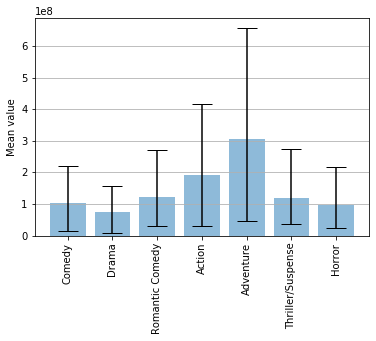

--------------Comparing pairs ---------------
Comedy  t = 0.0
Comedy  p = 1.0
--------------Comparing pairs ---------------
Comedy  t = 3.902832018326808
Drama  p = 0.00010360707328518365
--------------Comparing pairs ---------------
Comedy  t = -1.133184640248343
Romantic Comedy  p = 0.26012396997870724
--------------Comparing pairs ---------------
Comedy  t = -5.224645662167092
Action  p = 3.316727285531521e-07
--------------Comparing pairs ---------------
Comedy  t = -8.369259549561942
Adventure  p = 3.656855407182403e-14
--------------Comparing pairs ---------------
Comedy  t = -0.8204870361815635
Thriller/Suspense  p = 0.41320271217406157
--------------Comparing pairs ---------------
Comedy  t = 0.49828837709641166
Horror  p = 0.6193395030371198
--------------Comparing pairs ---------------
Drama  t = -3.902832018326808
Comedy  p = 0.00010360707328518365
--------------Comparing pairs ---------------
Drama  t = 0.0
Drama  p = 1.0
--------------Comparing pairs ---------------
Drama 

In [69]:
unique_genres = movie_data['m_genre'].unique()
not_popular_genres = ['Musical','Western','Black Comedy','Documentary','Concert/Performance']

popular_genres = list(filter(lambda x: x not in not_popular_genres, unique_genres))

#find the mean, count and std of the values
mean_values_dataframe = pd.DataFrame(movie_data.groupby('m_genre', as_index=False)['w_gross'].agg([np.mean, 'count', np.std]))

#reset the index from aggregating the mean, count and standard deviation
mean_values_dataframe = mean_values_dataframe.reset_index()

#drop unnecessary rows according to unpopular genres
mean_values_dataframe = mean_values_dataframe[~mean_values_dataframe['m_genre'].isin(not_popular_genres)]

print(mean_values_dataframe)

labels = popular_genres
x_pos = np.arange(len(labels))
mean_values = []
std_values = []
lower_error_list = []
upper_error_list = []

#for 95% confidence
confidence_value = 1.96

for x in popular_genres:
    row = mean_values_dataframe.loc[mean_values_dataframe['m_genre'] == x]
    mean = row.iloc[0]['mean']
    std = row.iloc[0]['std']
    sample_size = row.iloc[0]['count']
    mean_values.append(mean)
    std_values.append(std)
    
    lower = mean - confidence_value*(std/math.sqrt(sample_size))
    upper = mean + confidence_value*(std/math.sqrt(sample_size))
    
    lower_error_list.append(lower)
    upper_error_list.append(upper)
    
     
    

error_bars = [lower_error_list,upper_error_list]    

print("\nError bars values")
print("------------------------------")
print("0 is the lower, 1 is the upper")
print(pd.DataFrame(error_bars))

fig, ax = plt.subplots()
#yerr takes as input two a two size list that contains the upper and lower bounds of the error
ax.bar(x_pos, mean_values,
       yerr=error_bars,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)


ax.set_ylabel('Mean value')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels,rotation='vertical')
ax.yaxis.grid(True)
plt.show()


dataframe_containing_genre = movie_data[movie_data['m_genre'].str.contains("Action")]
dataframe_containing_genre['w_gross']
#stats.ttest_ind(, )


for x,obj in enumerate(popular_genres):
    first_dataframe = movie_data[movie_data["m_genre"].str.contains(popular_genres[x])]
    first_array = first_dataframe['w_gross']
    for y,objj in enumerate(popular_genres):
        second_dataframe = movie_data[movie_data["m_genre"].str.contains(popular_genres[y])]
        second_array = second_dataframe['w_gross']

        
        t2, p2 = stats.ttest_ind(first_array.to_numpy(),second_array.to_numpy(),equal_var=False)
        print("--------------Comparing pairs ---------------")
        print(popular_genres[x]," t = " + str(t2))
        print(popular_genres[y]," p = " + str(p2))
 


The t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups